In [10]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import requests
from scipy.sparse import hstack
from scipy.special import expit

In [2]:
def download_data(url):
# data_url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale'
    data = requests.get(url)
    file_name = url.split('/')[-1] + '.svm'
    with open(file_name, 'w') as f:
        f.write(data.text)
    return file_name

In [10]:
a9a = download_data('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a')
a9at = download_data('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t')

In [4]:
X, y = load_svmlight_file('a9a.svm', n_features=123)
X_test, y_test = load_svmlight_file('a9a.t.svm', n_features=123)

In [5]:
def sigmoid(z):  
    return 1.0 / (1 + np.exp(-z))
# avoid overflow
#     return expit(z)

In [6]:
def loss_fn(X, y, w):
    m = X.shape[0]
    h = sigmoid(X.dot(w))
#     if 0 in h or 1 in h:
#         print(h)
    j = np.sum(y*np.log(h)+(1-y)*np.log(1-h)) / m
    return -j

In [7]:
def gradient(X, y, w):
    h = sigmoid(X.dot(w))
    error = h - y
    grad = X.T.dot(error)
    return grad

In [8]:
def logistic_regression(X, y, iterations, learning_rate, method='gd'):
    loss_history = []
    X0 = np.ones((X.shape[0], 1))
    X = hstack([X0, X])
    w = np.ones(X.shape[1])
    v = np.zeros(X.shape[1])
    G = np.zeros(X.shape[1])
    gamma = 0.9
    beta = 0.9
    epsilon = 1e-5
    delta = np.zeros(X.shape[1])
    m = np.zeros(X.shape[1])
    
    loss = loss_fn(X, y, w)
    loss_history.append(loss)
    for i in range(iterations):
        if method == 'gd':            
            grad = gradient(X, y, w)
            w -= learning_rate * grad
            
        elif method == 'NAG':
            grad = gradient(X, y, w - gamma * v)
            v = gamma * v + learning_rate * grad
            w -= v
            
        elif method == 'RMSProp':
            grad = gradient(X, y, w)
            G = gamma * G + (1 - gamma) * np.square(grad)
            w -= learning_rate * 100 * grad / np.sqrt(G + epsilon)
            
        elif method == 'AdaDelta':
            grad = gradient(X, y, w)
            G = gamma * G + (1 - gamma)* np.square(grad)
            dw = -np.sqrt(delta + epsilon) / np.sqrt(G + epsilon) * grad
            w += dw
            delta = gamma * delta + (1 - gamma) * np.square(delta)
            
        elif method == 'Adam':
            t = i + 1
            grad = gradient(X, y, w)
            m = beta * m + (1 - beta) * grad
            G = gamma * G + (1 - gamma) * np.square(grad)
            alpha = learning_rate * 100 * np.sqrt(1 - gamma ** t) / (1 - beta ** t)
            w -= alpha * m / np.sqrt(G + epsilon)
#             print(alpha)
        
            
            
        loss = loss_fn(X, y, w)
        loss_history.append(loss)
        
    return w, loss_history

In [61]:
le = LabelEncoder()
w, loss_history = logistic_regression(X, le.fit_transform(y), 3000, 0.001, method='Adam')
print(w)
# print(loss_history)

[ -6.23485344e-01  -1.01577441e+00  -3.26526821e-02   5.71499533e-01
   8.76126557e-01   8.80121104e-01   3.03142622e-01  -9.62986451e-02
   5.50094646e-01   7.42806132e-01   5.04262133e-02  -3.21537154e-02
  -1.99933566e+00  -1.99513141e+00  -6.99334722e-01  -4.94761287e-01
  -5.00698159e-01  -4.85599605e-01  -4.65898795e-01  -4.46731947e-02
  -4.65073257e-03   7.55566777e-01  -1.81555885e-01   8.68520156e-01
   5.94542918e-02   7.25743961e-02   3.34825716e-01   1.23397322e-01
   1.11465302e+00   2.72796437e-01   1.05738291e-01   6.54505835e-01
   1.03196989e+00   3.40675326e-01  -1.99899913e+00  -1.74317366e+00
  -1.81555885e-01  -4.65073257e-03   7.87803300e-02   8.11702806e-01
   8.91443892e-01  -1.31994431e+00  -1.53105602e+00  -1.39558328e+00
  -8.89674193e-01  -1.24731968e+00   1.62649953e+00   7.73913294e-01
   1.39002698e-01  -6.73107443e-01   3.90412167e-01   8.64134439e-01
   6.23557093e-01  -5.52089280e-01  -2.67068247e-01   1.17585318e-01
  -7.27322276e-01  -2.04348691e-03

In [59]:
X0 = np.ones((X_test.shape[0], 1))
X1 = hstack([X0, X_test])
pred = np.round(sigmoid(X1.dot(w)))

In [60]:

# pred = [1 if i == 1 else -1 for i in pred]
accuracy_score(pred, le.transform(y_test))

0.85000921319329281

In [52]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
print(clf.score(X_test, y_test))
print (clf.intercept_, clf.coef_)

0.849886370616
[-0.61226923] [[ -1.38186964e+00  -4.10534879e-01   1.91495902e-01   4.93576938e-01
    4.95062442e-01   2.62008012e-01  -1.36232303e-01   5.06998313e-01
    6.94979401e-01   1.14332968e-02  -7.07484710e-02  -8.55288307e-01
   -1.46797029e-01  -2.90251324e-01  -8.87454608e-02  -9.35988394e-02
   -8.06781036e-02  -5.89955060e-02  -3.24236310e-01  -6.34109335e-02
    1.89987943e-01  -2.40393283e-01   5.73926806e-01   4.67451071e-03
    1.43579707e-02  -2.20267825e-01  -4.22765556e-01   5.29603171e-01
   -8.69488850e-03  -3.59872367e-01   9.46111332e-02   7.32595009e-01
   -1.99892732e-01  -9.12491884e-01  -1.30108812e+00  -2.40393283e-01
   -6.34109335e-02   1.90324814e-02   9.73590617e-01   1.28371810e+00
   -7.50239729e-01  -9.67231794e-01  -8.15146097e-01  -3.20658454e-01
   -6.54630682e-01   1.61191942e+00   7.95058392e-01   1.69697997e-01
   -6.34600179e-01   4.19409775e-01   8.92255089e-01   6.54334650e-01
   -5.15156287e-01  -2.38314201e-01   1.48122318e-01  -6.8824

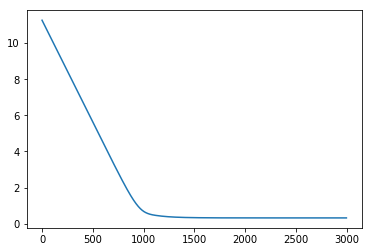

In [54]:
plt.plot(loss_history)
plt.show()
# print(loss_history)

/home/sundoge/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


accuracy:  0.842638658559 ------ NAG
accuracy:  0.850132055771 ------ RMSProp
accuracy:  0.849640685462 ------ AdaDelta
accuracy:  0.850009213193 ------ Adam


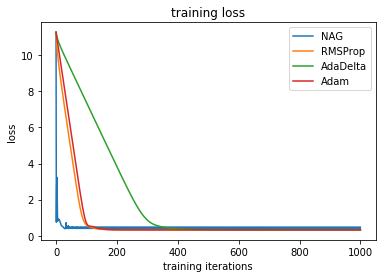

In [11]:
f = plt.figure('Loss')
ax = f.add_subplot(111)
ax.set_title('training loss')
ax.set_xlabel('training iterations')
ax.set_ylabel('loss')
algorithms = ['NAG', 'RMSProp', 'AdaDelta', 'Adam']
for algorithm in algorithms:
    le = LabelEncoder()
    w, loss_history = logistic_regression(X, le.fit_transform(y), 1000, 0.0001, method=algorithm)
    X0 = np.ones((X_test.shape[0], 1))
    X1 = hstack([X0, X_test])
    pred = np.round(sigmoid(X1.dot(w)))
    print('accuracy: ', accuracy_score(pred, le.transform(y_test)), '------', algorithm)
    ax.plot(loss_history, label=algorithm)

ax.legend()
plt.show()